# **CodeChallenge:** Unfortunating Starting Value

## Goals for this Challenge

### Step 1: Use GD 1D to find minimum of the following function:
We want to minimize the function:

$$
\huge f(x) = \cos(2\pi x) + x^2, \quad x \in [-2, 2]
$$

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline
plt.style.use("dark_background")

In [3]:
x = sp.symbols("x")

In [145]:
expr = sp.cos(2*sp.pi*x) + x**2
func = sp.lambdify(x, expr, "numpy")

expr

x**2 + cos(2*pi*x)

In [146]:
deriv = sp.diff(expr)
deriv_func = sp.lambdify(x, deriv, "numpy")
deriv

2*x - 2*pi*sin(2*pi*x)

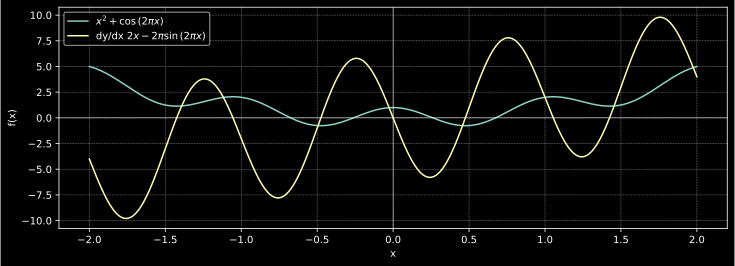

In [147]:
x_values = np.linspace(-2,2,2001)
plt.figure(figsize=(12,4))
plt.plot(x_values, func(x_values), label=f"${sp.latex(expr)}$")
plt.plot(x_values, deriv_func(x_values), label=f"dy/dx ${sp.latex(deriv)}$")
plt.axhline(0, color='white',linewidth=0.5)
plt.axvline(0, color='white',linewidth=0.5)

plt.grid(color="gray", linestyle="--", linewidth=0.5)
plt.xlabel("x");
plt.ylabel("f(x)")
plt.legend();
plt.show();

In [28]:
from IPython.display import HTML
from matplotlib import animation

In [106]:
def grad_1D(expr, x_values, learning_rate, training_epochs, display_animation=False):
    
    func = sp.lambdify(x, expr, "numpy")
    deriv = sp.diff(expr)
    deriv_func = sp.lambdify(x, deriv, "numpy")
    
    #algorithm
    local_min = np.random.choice(x_values,1)
    initial_local_min = local_min
    print(f"Initial Random Local Min {initial_local_min}")
    model_params = np.zeros((training_epochs, 2)) #shape epochs x 2 cols
    for i in range(0, training_epochs):
        grad = deriv_func(local_min)
        local_min = local_min - (grad*learning_rate)
        model_params[i,0] = local_min[0]
        model_params[i,1] = grad[0]     
    print(f"Final Local Min after {training_epochs} epochs: {local_min}")
    
    #visualize algorithms details per iteration
    fig,ax = plt.subplots(1,2,figsize=(12,4))
    for i in range(2):
      ax[i].plot(model_params[:,i],'o-')
      ax[i].set_xlabel('Iteration')
      ax[i].set_title(f'Final estimated minimum: {local_min[0]:.5f}')

    ax[0].set_ylabel('Local minimum')
    ax[1].set_ylabel('Derivative')
    plt.show()
    
    if display_animation:
        #prepare animation
        grad_fig, ax = plt.subplots(figsize=(12,6), dpi=100)

        ax.plot(x_values, func(x_values), label=f"${sp.latex(expr)}$")
        ax.plot(x_values, deriv_func(x_values), label=f"dy/dx ${sp.latex(deriv)}$")

        plt.title(f"Empirical Local Minimum: {local_min[0]}")


        plt.axhline(0, color='white',linewidth=0.5)
        plt.axvline(0, color='white',linewidth=0.5)

        plt.grid(color="gray", linestyle="--", linewidth=0.5)
        plt.xlabel("x");
        plt.ylabel("f(x)")
        plt.legend();
        plt.close()

        def tangent_line(x, x1, y1):
            # m*x+b
            return deriv_func(x1)*(x-x1) + y1

        title = ax.set_title('', fontweight="bold")
        local_min_scat = ax.scatter(initial_local_min, func(initial_local_min), color="orange")
        initial_tangent_range = np.linspace(initial_local_min-0.5, initial_local_min+0.5, 10)
        tangent_plot = ax.plot(initial_tangent_range, tangent_line(x=initial_tangent_range,
                                                                   x1=initial_local_min,
                                                                   y1=func(initial_local_min)), linestyle="--",  color="orange", linewidth=2)[0]
        grad_annotation = ax.annotate(
            'Gradient={0:2f}'.format(deriv_func(initial_local_min[0])),
            xy=(initial_local_min,func(initial_local_min)), xytext=(initial_local_min,func(initial_local_min)+1),
            arrowprops = {'arrowstyle': "-", 'facecolor' : 'orange'},
            textcoords='data', color='orange' , rotation=20, fontweight="bold"
        )

        def drawframe(epoch):
            title.set_text('Epoch={0:4d}'.format(epoch, model_params[epoch, 1]))
            x1 = model_params[epoch, 0]
            y1 = func(model_params[epoch, 0])
            local_min_scat.set_offsets((x1, y1))
            tangent_range = np.linspace(x1-0.5, x1+0.5, 10)
            tangent_values = tangent_line(x=tangent_range, x1=x1 ,y1=y1)
            tangent_plot.set_xdata(tangent_range)
            tangent_plot.set_ydata(tangent_values)
            grad_annotation.set_position((x1, y1+1))
            grad_annotation.xy = (x1, y1)
            grad_annotation.set_text('Gradient={0:2f}'.format(model_params[epoch, 1]))
            return local_min_scat,

        # blit=True re-draws only the parts that have changed.
        #1000 interval for GIFS
        anim = animation.FuncAnimation(grad_fig, drawframe, frames=training_epochs, repeat=False, interval=100, blit=True) 


        writer = animation.PillowWriter(fps=30,
                                        metadata=dict(artist='Me'),
                                        bitrate=1800)
        # ani.save('gradient1D.gif', writer=writer)
        # from IPython.display import HTML
        # HTML(anim.to_html5_video())

        return anim, writer

In [102]:
expr

x**2 + cos(2*pi*x)

In [97]:
x_values

array([-2.   , -1.998, -1.996, ...,  1.996,  1.998,  2.   ])

In [88]:
deriv

2*x - 2*pi*sin(2*pi*x)

In [89]:
sp.diff(deriv)

-4*pi**2*cos(2*pi*x) + 2

Initial Random Local Min [0.71]
Final Local Min after 150 epochs: [0.47627627]


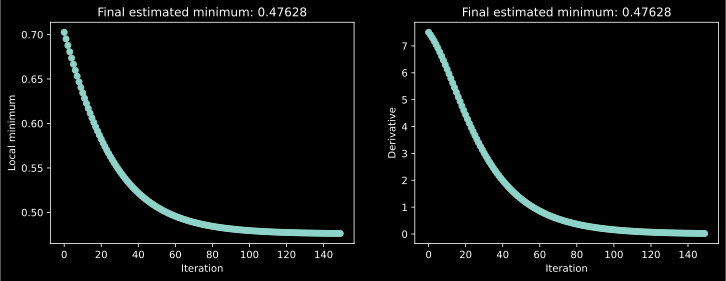

In [107]:
anim, writer = grad_1D(expr=expr,
                       x_values=x_values, learning_rate=0.001, training_epochs=150, display_animation=True)
# anim.save('gradient1D.gif', writer=writer)
from IPython.display import HTML
HTML(anim.to_html5_video())

### Step 2: Hard-code a starting value of \(x=0\)

In [117]:
def x0_grad_1D(expr, x_values, learning_rate, training_epochs, display_animation=False):
    
    func = sp.lambdify(x, expr, "numpy")
    deriv = sp.diff(expr)
    deriv_func = sp.lambdify(x, deriv, "numpy")
    
    #algorithm
    local_min = np.array([0])
    initial_local_min = local_min
    print(f"Initial Random Local Min {initial_local_min}")
    model_params = np.zeros((training_epochs, 2)) #shape epochs x 2 cols
    for i in range(0, training_epochs):
        grad = deriv_func(local_min)
        local_min = local_min - (grad*learning_rate)
        model_params[i,0] = local_min[0]
        model_params[i,1] = grad[0]     
    print(f"Final Local Min after {training_epochs} epochs: {local_min}")
    
    #visualize algorithms details per iteration
    fig,ax = plt.subplots(1,2,figsize=(12,4))
    for i in range(2):
      ax[i].plot(model_params[:,i],'o-')
      ax[i].set_xlabel('Iteration')
      ax[i].set_title(f'Final estimated minimum: {local_min[0]:.5f}')

    ax[0].set_ylabel('Local minimum')
    ax[1].set_ylabel('Derivative')
    plt.show()
    
    if display_animation:
        #prepare animation
        grad_fig, ax = plt.subplots(figsize=(12,6), dpi=100)

        ax.plot(x_values, func(x_values), label=f"${sp.latex(expr)}$")
        ax.plot(x_values, deriv_func(x_values), label=f"dy/dx ${sp.latex(deriv)}$")

        plt.title(f"Empirical Local Minimum: {local_min[0]}")


        plt.axhline(0, color='white',linewidth=0.5)
        plt.axvline(0, color='white',linewidth=0.5)

        plt.grid(color="gray", linestyle="--", linewidth=0.5)
        plt.xlabel("x");
        plt.ylabel("f(x)")
        plt.legend();
        plt.close()

        def tangent_line(x, x1, y1):
            # m*x+b
            return deriv_func(x1)*(x-x1) + y1

        title = ax.set_title('', fontweight="bold")
        local_min_scat = ax.scatter(initial_local_min, func(initial_local_min), color="orange")
        initial_tangent_range = np.linspace(initial_local_min-0.5, initial_local_min+0.5, 10)
        tangent_plot = ax.plot(initial_tangent_range, tangent_line(x=initial_tangent_range,
                                                                   x1=initial_local_min,
                                                                   y1=func(initial_local_min)), linestyle="--",  color="orange", linewidth=2)[0]
        grad_annotation = ax.annotate(
            'Gradient={0:2f}'.format(deriv_func(initial_local_min[0])),
            xy=(initial_local_min,func(initial_local_min)), xytext=(initial_local_min,func(initial_local_min)+1),
            arrowprops = {'arrowstyle': "-", 'facecolor' : 'orange'},
            textcoords='data', color='orange' , rotation=20, fontweight="bold"
        )

        def drawframe(epoch):
            title.set_text('Epoch={0:4d}'.format(epoch, model_params[epoch, 1]))
            x1 = model_params[epoch, 0]
            y1 = func(model_params[epoch, 0])
            local_min_scat.set_offsets((x1, y1))
            tangent_range = np.linspace(x1-0.5, x1+0.5, 10)
            tangent_values = tangent_line(x=tangent_range, x1=x1 ,y1=y1)
            tangent_plot.set_xdata(tangent_range)
            tangent_plot.set_ydata(tangent_values)
            grad_annotation.set_position((x1, y1+1))
            grad_annotation.xy = (x1, y1)
            grad_annotation.set_text('Gradient={0:2f}'.format(model_params[epoch, 1]))
            return local_min_scat,

        # blit=True re-draws only the parts that have changed.
        #1000 interval for GIFS
        anim = animation.FuncAnimation(grad_fig, drawframe, frames=training_epochs, repeat=False, interval=100, blit=True) 


        writer = animation.PillowWriter(fps=30,
                                        metadata=dict(artist='Me'),
                                        bitrate=1800)
        # ani.save('gradient1D.gif', writer=writer)
        # from IPython.display import HTML
        # HTML(anim.to_html5_video())

        return anim, writer

Initial Random Local Min [0]
Final Local Min after 150 epochs: [0.]


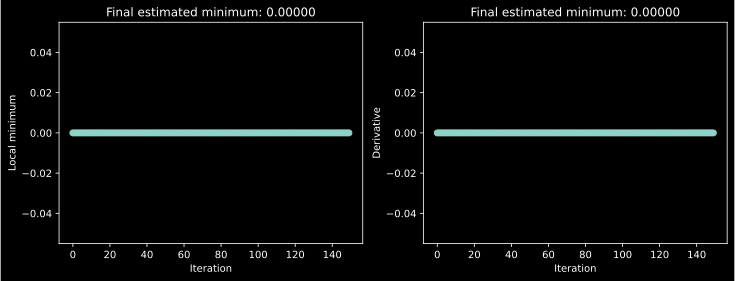

In [109]:
anim, writer = x0_grad_1D(expr=expr,
                       x_values=x_values, learning_rate=0.001, training_epochs=150, display_animation=True)
# anim.save('gradient1D.gif', writer=writer)
from IPython.display import HTML
HTML(anim.to_html5_video())

* #### **Fíjate!** Ahora, habíamos "forzado" a que el valor inincial comenzase en x=0, provocando que el modelo se quede "inmovilizado" en ese punto, ya que se trata de un máximo local, (por lo tanto tiene una pendiente de 0) Esto se trata de un **valor poco afortunado de comienzo**

> - #### Si calculas el nuevo mínimo: `antiguo mínimo - (su derivada*learning_rate)`, si, como en el caso anterior, el modelo se encuentra en un punto cuya derivada es 0, entonces la multiplicación es igual a 0, por lo que no se suma/resta nada al antiguo mínimo, y se queda donde está

> - #### Como vimos entonces en el ejemplo anterior, el modelo se quedó en un máximo en lugar de quedar en un mínimo, ya que el punto de comienzo fue x=0, y en dicho punto había un máximo (pendiente=0) por lo que el algoritmo se "atrapó" allí

> - #### Esto **provoca que no haya aprendizaje, pues los parámetros del modelo no se actualizan. Este fenómeno es denominado:**

>>>>>>>> ## **VANISHING GRADIENT**
>>>>>>>> #### *La derivada (pendiente) se convierte tan cercana a 0, de modo que el proceso de aprendizaje es frenado*

> - #### **Pero...** la probabilidad de que algo así ocurra es muy pequeña, ya que los parámetros (mínimos locales) se inincializan aleatoriamente, por lo que, en un espacio multidimensional (muchos parámetros) es minúscula


In [122]:
34 - (0*0.001) #derivada=0, x se queda igual

34.0

__________________________

**Additional explorations** (Udemy Course) Mi unidad/Neural Networks/resources/courses/Udemy/A deep understanding of deep learning (with Python intro) - Mike X Cohen/code/gradientDescent/DUDL_GradientDescent_CodeChallengeStartValue.ipynb

> 1) The derivative has a multiplicative factor of 2 in it. Is that constant necessary for the accuracy of the g.d. result?
   Try removing that '2' from the derivative and see whether the model can still find the minimum. Before running the
   code, think about what you expect to happen. Does reality match your expectations? Why is (or isn't) that factor necessary?
   
> > *No afecta, ya que factor de 2 hace que el valor de x incremente de forma más elevada*

> 2) What about the factor of '2' inside the np.sin() function? Is that important? Can you get an accurate result if you
   remove it?

> 3) Try setting the initial value to a small but non-zero number, e.g., .0001 or -.0001. Does that help the solution?


In [124]:
deriv

2*x - 2*pi*sin(2*pi*x)

0.9129452507276277

In [139]:
def mod_grad_1D(hardcoded_val, expr, x_values, learning_rate, training_epochs, display_animation=False):
    
    func = sp.lambdify(x, expr, "numpy")
    deriv = sp.diff(expr)
    deriv_func = sp.lambdify(x, deriv, "numpy")
    
    #algorithm
    local_min = np.array([hardcoded_val])
    initial_local_min = local_min
    print(f"Initial Random Local Min {initial_local_min}")
    model_params = np.zeros((training_epochs, 2)) #shape epochs x 2 cols
    for i in range(0, training_epochs):
        grad = deriv_func(local_min)
        local_min = local_min - (grad*learning_rate)
        model_params[i,0] = local_min[0]
        model_params[i,1] = grad[0]     
    print(f"Final Local Min after {training_epochs} epochs: {local_min}")
    
    #visualize algorithms details per iteration
    fig,ax = plt.subplots(1,2,figsize=(12,4))
    for i in range(2):
      ax[i].plot(model_params[:,i],'o-')
      ax[i].set_xlabel('Iteration')
      ax[i].set_title(f'Final estimated minimum: {local_min[0]:.5f}')

    ax[0].set_ylabel('Local minimum')
    ax[1].set_ylabel('Derivative')
    plt.show()
    
    if display_animation:
        #prepare animation
        grad_fig, ax = plt.subplots(figsize=(12,6), dpi=100)

        ax.plot(x_values, func(x_values), label=f"${sp.latex(expr)}$")
        ax.plot(x_values, deriv_func(x_values), label=f"dy/dx ${sp.latex(deriv)}$")

        plt.title(f"Empirical Local Minimum: {local_min[0]}")


        plt.axhline(0, color='white',linewidth=0.5)
        plt.axvline(0, color='white',linewidth=0.5)

        plt.grid(color="gray", linestyle="--", linewidth=0.5)
        plt.xlabel("x");
        plt.ylabel("f(x)")
        plt.legend();
        plt.close()

        def tangent_line(x, x1, y1):
            # m*x+b
            return deriv_func(x1)*(x-x1) + y1

        title = ax.set_title('', fontweight="bold")
        local_min_scat = ax.scatter(initial_local_min, func(initial_local_min), color="orange")
        initial_tangent_range = np.linspace(initial_local_min-0.5, initial_local_min+0.5, 10)
        tangent_plot = ax.plot(initial_tangent_range, tangent_line(x=initial_tangent_range,
                                                                   x1=initial_local_min,
                                                                   y1=func(initial_local_min)), linestyle="--",  color="orange", linewidth=2)[0]
        grad_annotation = ax.annotate(
            'Gradient={0:2f}'.format(deriv_func(initial_local_min[0])),
            xy=(initial_local_min,func(initial_local_min)), xytext=(initial_local_min,func(initial_local_min)+1),
            arrowprops = {'arrowstyle': "-", 'facecolor' : 'orange'},
            textcoords='data', color='orange' , rotation=20, fontweight="bold"
        )

        def drawframe(epoch):
            title.set_text('Epoch={0:4d}'.format(epoch, model_params[epoch, 1]))
            x1 = model_params[epoch, 0]
            y1 = func(model_params[epoch, 0])
            local_min_scat.set_offsets((x1, y1))
            tangent_range = np.linspace(x1-0.5, x1+0.5, 10)
            tangent_values = tangent_line(x=tangent_range, x1=x1 ,y1=y1)
            tangent_plot.set_xdata(tangent_range)
            tangent_plot.set_ydata(tangent_values)
            grad_annotation.set_position((x1, y1+1))
            grad_annotation.xy = (x1, y1)
            grad_annotation.set_text('Gradient={0:2f}'.format(model_params[epoch, 1]))
            return local_min_scat,

        # blit=True re-draws only the parts that have changed.
        #1000 interval for GIFS
        anim = animation.FuncAnimation(grad_fig, drawframe, frames=training_epochs, repeat=False, interval=100, blit=True) 


        writer = animation.PillowWriter(fps=30,
                                        metadata=dict(artist='Me'),
                                        bitrate=1800)
        # ani.save('gradient1D.gif', writer=writer)
        # from IPython.display import HTML
        # HTML(anim.to_html5_video())

        return anim, writer

Initial Random Local Min [0.0001]
Final Local Min after 150 epochs: [0.47580245]


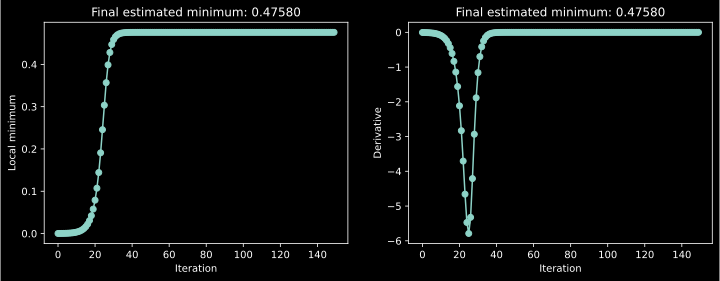

In [135]:
anim, writer = mod_grad_1D(hardcoded_val=0.0001, expr=expr,
                       x_values=x_values, learning_rate=0.01, training_epochs=150, display_animation=True)
# anim.save('gradient1D.gif', writer=writer)
from IPython.display import HTML
HTML(anim.to_html5_video())

* #### Observa cómo al haber cambiado ese valor "forzado" de inincialización del mínimo local (que antes lo pusimos en 0), al haberlo puesto en 0.0001 (una pequeña modificación del valor) el algoritmo buscará ahora "desplazarse" hacia la derecha en busca de hacer cero la pendiente

In [138]:
0.001 - (-3*0.01) #imaginemos que en dicho punto que hemos "forzado", la derivada es -3 (pues en ese lado está decreciendo f(x))

0.031

* #### De mismo modo, habiendo establecido ahora en lugar de 0.0001, un valor -0.0001 hará el mismo efecto, solo que el algoritmo se desplazará a la izquierda

Initial Random Local Min [-0.0001]
Final Local Min after 150 epochs: [-0.47580245]


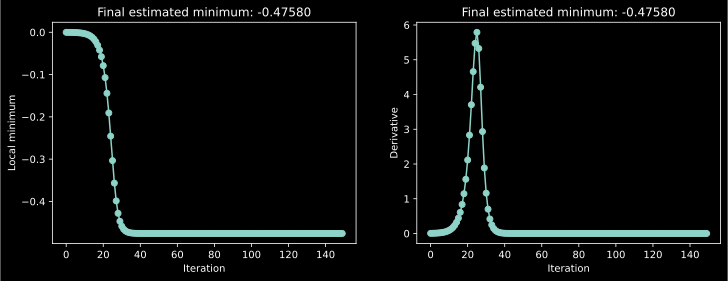

In [140]:
anim, writer = mod_grad_1D(hardcoded_val=-0.0001, expr=expr,
                       x_values=x_values, learning_rate=0.01, training_epochs=150, display_animation=True)
# anim.save('gradient1D.gif', writer=writer)
from IPython.display import HTML
HTML(anim.to_html5_video())

In [141]:
-0.001 - (-3*0.01) #imaginemos que en dicho punto que hemos "forzado", la derivada es -3 (pues en ese lado está decreciendo f(x))

0.028999999999999998